<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Maharashtra/ncpMaharashtra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!git clone https://github.com/raishagun/Election-Prediction.git

fatal: destination path 'Election-Prediction' already exists and is not an empty directory.


In [64]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"ncp maharashtra"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('ncp_maharashtra.csv',index = False)

2020-11-21 20:07:03
1330241334846885890
False
@NagariMumbaikar @arvindgunasekar I think u r poor in maths, let me explain! BJP got 105 seats in Maharashtra! Highest ! But shiv Sena cheated BJP n formed alliance with Congo n NCP .maharastra ppl didn’t kick bjp.
suresh_sushmita

Twitter for iPhone
8
652
616
0
<--------------------------------------------------->
1
2020-11-21 18:43:22
1330220273300332549
False
@OfficeofUT @AUThackeray @rautsanjay61 

If you want win the heart of #Mumbaikar and #Maharashtra then support #India (#Bharat) is our #Hindu_Rashtra 

Already #Congress and #NCP is declare that they are participating independent in #BMC_2022 

Otherwise you are not going to....
anup_dhule

Twitter for Android
0
433
435
0
<--------------------------------------------------->
2
2020-11-21 15:26:44
1330170788528480262
False
@gauti8619 @WcwwweU @arvindgunasekar 😂 it's Maharashtra my friend. Don't you saw how so called Chanakya of BJP got defeated in government formation? Every single M

In [65]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       213 non-null    datetime64[ns]
 1   Tweet_id   213 non-null    int64         
 2   Verified   213 non-null    bool          
 3   Tweet      213 non-null    object        
 4   User       213 non-null    object        
 5   Location   213 non-null    object        
 6   Source     213 non-null    object        
 7   Likes      213 non-null    int64         
 8   Followers  213 non-null    int64         
 9   Following  213 non-null    int64         
 10  Retweets   213 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 17.0+ KB


In [67]:
df.shape

(213, 11)

In [68]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [69]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [70]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [71]:
df['Source'].value_counts()

Twitter for Android    107
Twitter Web App         60
Twitter for iPhone      28
TweetDeck               12
Twitter for iPad         2
SocialFlow               2
ht-twitter-handler       1
Sprout Social            1
Name: Source, dtype: int64

In [72]:
df['Location'].nunique()

80

In [73]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

213

In [74]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


213

In [75]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [76]:
df['Tweet'].duplicated().sum()

0

In [77]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(213, 11)

In [78]:
df['Tweet'].duplicated().sum()

0

In [79]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [80]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [81]:
df.shape

(213, 12)

In [82]:
df['Processed_Tweet']

0      @NagariMumbaikar @arvindgunasekar I think u r ...
1      @OfficeofUT @AUThackeray @rautsanjay61 \n\nIf ...
2      @gauti8619 @WcwwweU @arvindgunasekar  it's Mah...
3      @gauti8619 @WcwwweU @arvindgunasekar On which ...
4      The Congress’ frustration in the Maharashtra g...
                             ...                        
208    @Swamy39 @Dharma2X @SeriSushant @here_for_ssr ...
209    @ANI You should ask to congress and NCP about ...
210    Ms. @_sabanaqvi who celebrated Sena-Con-NCP Go...
211    @ShefVaidya @CTRavi_BJP Maharashtra BJP is in ...
212    #ShivSena MLAs will defect in bulk and join #B...
Name: Processed_Tweet, Length: 213, dtype: object

In [83]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      @NagariMumbaikar @arvindgunasekar I think u r ...
1      @OfficeofUT @AUThackeray @rautsanjay61 \n\nIf ...
2      @gauti8619 @WcwwweU @arvindgunasekar  it's Mah...
3      @gauti8619 @WcwwweU @arvindgunasekar On which ...
4      The Congress’ frustration in the Maharashtra g...
                             ...                        
208    @Swamy39 @Dharma2X @SeriSushant @here_for_ssr ...
209    @ANI You should ask to congress and NCP about ...
210    Ms. @_sabanaqvi who celebrated Sena-Con-NCP Go...
211    @ShefVaidya @CTRavi_BJP Maharashtra BJP is in ...
212    #ShivSena MLAs will defect in bulk and join #B...
Name: Processed_Tweet, Length: 213, dtype: object

In [84]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0          I think u r poor in maths, let me explain!...
1            \n\nIf you want win the heart of #Mumbai...
2             it's Maharashtra my friend. Don't you s...
3            On which planet u are leaving? Here BJP ...
4      The Congress’ frustration in the Maharashtra g...
                             ...                        
208            Can Swamy ji reply what is the next st...
209      You should ask to congress and NCP about Mah...
210    Ms.   who celebrated Sena-Con-NCP Govt in Maha...
211        Maharashtra BJP is in even more dire state...
212    #ShivSena MLAs will defect in bulk and join #B...
Name: Processed_Tweet, Length: 213, dtype: object

In [85]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0          I think u r poor in maths, let me explain!...
1            \n\nIf you want win the heart of #Mumbai...
2             it's Maharashtra my friend. Don't you s...
3            On which planet u are leaving? Here BJP ...
4      The Congress’ frustration in the Maharashtra g...
                             ...                        
208            Can Swamy ji reply what is the next st...
209      You should ask to congress and NCP about Mah...
210    Ms.   who celebrated Sena-Con-NCP Govt in Maha...
211        Maharashtra BJP is in even more dire state...
212    #ShivSena MLAs will defect in bulk and join #B...
Name: Processed_Tweet, Length: 213, dtype: object

In [86]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0          I think u r poor in maths, let me explain!...
1            \n\nIf you want win the heart of Mumbaik...
2             it's Maharashtra my friend. Don't you s...
3            On which planet u are leaving? Here BJP ...
4      The Congress’ frustration in the Maharashtra g...
                             ...                        
208            Can Swamy ji reply what is the next st...
209      You should ask to congress and NCP about Mah...
210    Ms.   who celebrated Sena-Con-NCP Govt in Maha...
211        Maharashtra BJP is in even more dire state...
212    ShivSena MLAs will defect in bulk and join BJP...
Name: Processed_Tweet, Length: 213, dtype: object

In [87]:
!pip install tweet-preprocessor

In [88]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      I think u r poor in maths, let me explain! BJP...
1      If you want win the heart of Mumbaikar and Mah...
2      it's Maharashtra my friend. Don't you saw how ...
3      On which planet u are leaving? Here BJP MLAs a...
4      The Congress frustration in the Maharashtra go...
                             ...                        
208    Can Swamy ji reply what is the next strategy o...
209    You should ask to congress and NCP about Mahar...
210    Ms. who celebrated Sena-Con-NCP Govt in Mahara...
211    Maharashtra BJP is in even more dire state. Ca...
212    ShivSena MLAs will defect in bulk and join BJP...
Name: Processed_Tweet, Length: 213, dtype: object

In [89]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      I think u r poor in maths  let me explain  BJP...
1      If you want win the heart of Mumbaikar and Mah...
2      it s Maharashtra my friend  Don t you saw how ...
3      On which planet u are leaving  Here BJP MLAs a...
4      The Congress frustration in the Maharashtra go...
                             ...                        
208    Can Swamy ji reply what is the next strategy o...
209    You should ask to congress and NCP about Mahar...
210    Ms  who celebrated Sena Con NCP Govt in Mahara...
211    Maharashtra BJP is in even more dire state  Ca...
212    ShivSena MLAs will defect in bulk and join BJP...
Name: Processed_Tweet, Length: 213, dtype: object

In [90]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      i think u r poor in maths  let me explain  bjp...
1      if you want win the heart of mumbaikar and mah...
2      it s maharashtra my friend  don t you saw how ...
3      on which planet u are leaving  here bjp mlas a...
4      the congress frustration in the maharashtra go...
                             ...                        
208    can swamy ji reply what is the next strategy o...
209    you should ask to congress and ncp about mahar...
210    ms  who celebrated sena con ncp govt in mahara...
211    maharashtra bjp is in even more dire state  ca...
212    shivsena mlas will defect in bulk and join bjp...
Name: Processed_Tweet, Length: 213, dtype: object

In [91]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'if aligns with any party  then they r the loosers  no one will vote for bjp after that  if they have morality bjp shouldnt align with any in maharashtra either ncp or congis or sonia sena  fight independently    bjp will move majority govt next'

In [92]:
df['User'].value_counts()

Mahesh_garg        3
ss_suryawanshi     3
NagariMumbaikar    2
OpIndia_com        2
the_news_21        2
                  ..
Krunal_Goda        1
deepakdkokha       1
aaa844750          1
keypadguerilla     1
MonkMilitant       1
Name: User, Length: 201, dtype: int64

In [93]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


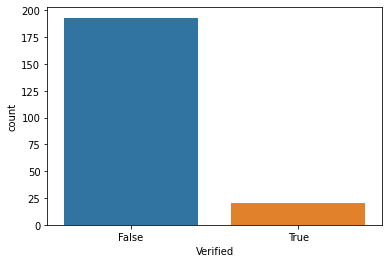

In [94]:
bar = sns.countplot(df['Verified'])

In [95]:
df['Verified'].value_counts()

False    193
True      20
Name: Verified, dtype: int64

In [96]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

OpIndia_com        2
the_hindu          2
GetNewsd           1
MumbaiMirror       1
CNNnews18          1
Ms_Aflatoon        1
TOIMumbai          1
ieexplained        1
ANI                1
htTweets           1
HindustanTimes     1
ThePuneMirror      1
UnSubtleDesi       1
NewIndianXpress    1
timesofindia       1
news18dotcom       1
MrsGandhi          1
manasi87           1
Name: User, dtype: int64

In [97]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 8, 16: 29, 17: 30, 18: 13, 19: 92, 20: 28, 21: 13})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

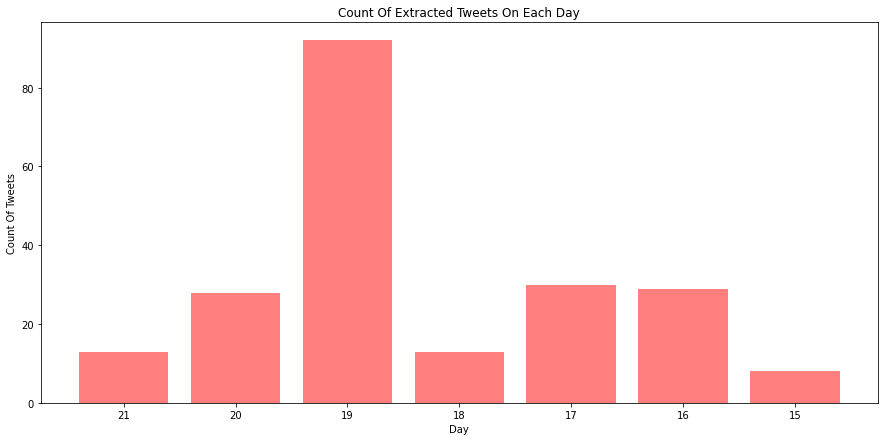

In [98]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [99]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 3,
         1: 5,
         2: 4,
         3: 6,
         4: 13,
         5: 17,
         6: 18,
         7: 12,
         8: 11,
         9: 16,
         10: 11,
         11: 9,
         12: 10,
         13: 13,
         14: 10,
         15: 19,
         16: 7,
         17: 12,
         18: 12,
         19: 2,
         20: 1,
         21: 1,
         23: 1})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

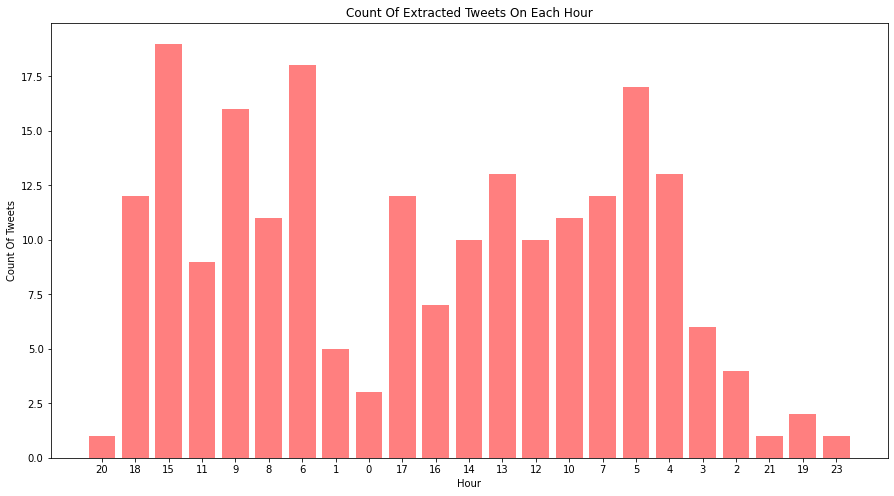

In [100]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [101]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [102]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['who', 'below', 'then', 'any', 'we', "it's", 'did', 'has', 'as', 'over', 'your', 'against', 'is', 'its', 'mightn', 'in', 'before', 'that', 'won', 'didn', 'while', 'here', 'because', 'should', 'ourselves', "shan't", "couldn't", 'from', 'to', 've', 'they', 'for', 'couldn', 'our', 'other', 'ain', 'each', 'only', 'i', "mustn't", 'above', 'same', 'doesn', 'or', 'themselves', 're', 'it', "she's", "isn't", 's', 'a', 'does', 'out', 'll', 'about', 'during', "should've", 'mustn', "that'll", 'than', 'which', 'doing', 'not', 'she', 'o', 'some', "hadn't", 'and', 'his', 'have', 'can', 'all', 'under', 'himself', "wasn't", 'how', "hasn't", 'itself', 'at', 'once', "doesn't", 'weren', 'just', 'by', 'after', 'he', 'ours', 'theirs', 'y', 'an', 'you', 'yours', 'shouldn', 'yourself', 'been', 'being', 'were', "aren't", 'off', 'into', 'me', 'herself', 'will', "needn't", 'this', 'was', 'aren', 'are', 'what', "you'd", "weren't", 'with', 'so', 'needn', 'be', "don't", 'too', 'these', 't', 'on', 'them', 'between'

In [104]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      think u r poor maths let explain bjp got seats...
1      want win heart mumbaikar maharashtra support i...
2      maharashtra friend saw called chanakya bjp got...
3      planet u leaving bjp mlas joining ncp shivsena...
4      congress frustration maharashtra govt delhi ra...
                             ...                        
208    swamy ji reply next strategy ss ncp congi maha...
209    ask congress ncp maharashtra government uddhav...
210    ms celebrated sena con ncp govt maharashtra ma...
211    maharashtra bjp even dire state caste politics...
212    shivsena mlas defect bulk join bjp retain hind...
Name: Processed_Tweet, Length: 213, dtype: object

In [105]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [think, u, r, poor, maths, let, explain, bjp, ...
1      [want, win, heart, mumbaikar, maharashtra, sup...
2      [maharashtra, friend, saw, called, chanakya, b...
3      [planet, u, leaving, bjp, mlas, joining, ncp, ...
4      [congress, frustration, maharashtra, govt, del...
                             ...                        
208    [swamy, ji, reply, next, strategy, ss, ncp, co...
209    [ask, congress, ncp, maharashtra, government, ...
210    [ms, celebrated, sena, con, ncp, govt, maharas...
211    [maharashtra, bjp, even, dire, state, caste, p...
212    [shivsena, mlas, defect, bulk, join, bjp, reta...
Name: Processed_Tweet, Length: 213, dtype: object

In [106]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [think, u, r, poor, math, let, explain, bjp, g...
1      [want, win, heart, mumbaikar, maharashtra, sup...
2      [maharashtra, friend, saw, call, chanakya, bjp...
3      [planet, u, leav, bjp, mla, join, ncp, shivsen...
4      [congress, frustrat, maharashtra, govt, delhi,...
                             ...                        
208    [swami, ji, repli, next, strategi, ss, ncp, co...
209    [ask, congress, ncp, maharashtra, govern, uddh...
210    [ms, celebr, sena, con, ncp, govt, maharashtra...
211    [maharashtra, bjp, even, dire, state, cast, po...
212    [shivsena, mla, defect, bulk, join, bjp, retai...
Name: Processed_Tweet, Length: 213, dtype: object

In [107]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 20:07:03,1330241334846885890,False,@NagariMumbaikar @arvindgunasekar I think u r ...,suresh_sushmita,,Twitter for iPhone,8,652,616,0,"[think, poor, math, let, explain, bjp, got, se..."
1,2020-11-21 18:43:22,1330220273300332549,False,@OfficeofUT @AUThackeray @rautsanjay61 \n\nIf ...,anup_dhule,,Twitter for Android,0,433,435,0,"[want, win, heart, mumbaikar, maharashtra, sup..."
2,2020-11-21 15:26:44,1330170788528480262,False,@gauti8619 @WcwwweU @arvindgunasekar 😂 it's Ma...,NagariMumbaikar,"Maharashtra, India",Twitter for Android,0,20,181,0,"[maharashtra, friend, saw, call, chanakya, bjp..."
3,2020-11-21 15:17:05,1330168362748547072,False,@gauti8619 @WcwwweU @arvindgunasekar On which ...,NagariMumbaikar,"Maharashtra, India",Twitter for Android,0,20,181,0,"[planet, leav, bjp, mla, join, ncp, shivsena, ..."
4,2020-11-21 11:40:59,1330113977045671936,False,The Congress’ frustration in the Maharashtra g...,SUMEETGOSWAMI,South wales,Twitter Web App,0,19,167,0,"[congress, frustrat, maharashtra, govt, delhi,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
208,2020-11-15 15:07:33,1327991637251739650,False,@Swamy39 @Dharma2X @SeriSushant @here_for_ssr ...,Andy_Cool28,,Twitter for Android,5,51,314,2,"[swami, repli, next, strategi, ncp, congi, mah..."
209,2020-11-15 14:51:56,1327987705397923840,False,@ANI You should ask to congress and NCP about ...,vij301,,Twitter for Android,0,2,39,0,"[ask, congress, ncp, maharashtra, govern, uddh..."
210,2020-11-15 13:23:51,1327965539696664579,False,Ms. @_sabanaqvi who celebrated Sena-Con-NCP Go...,MihirkJha,Twitter,Twitter for Android,67,12161,794,18,"[celebr, sena, con, ncp, govt, maharashtra, ma..."
211,2020-11-15 13:11:23,1327962399555534849,False,@ShefVaidya @CTRavi_BJP Maharashtra BJP is in ...,srinidhi4tweet,,Twitter Web App,12,22,254,3,"[maharashtra, bjp, even, dire, state, cast, po..."


In [108]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

3476

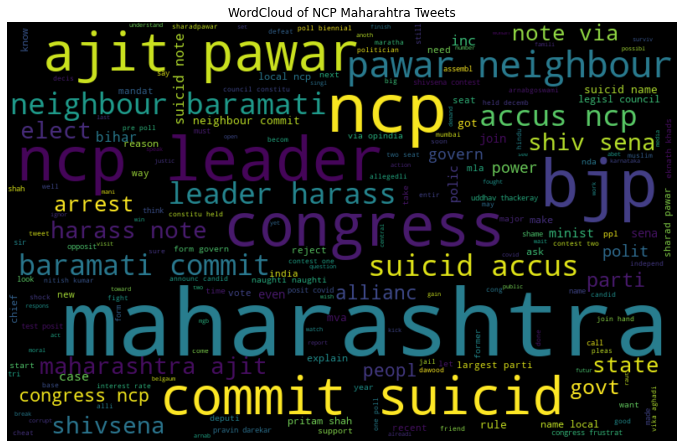

In [109]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of NCP Maharahtra Tweets")
plt.show()

In [110]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

213

In [111]:
len(text)

3476

In [112]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 64
Negative Tweets: 48
Neutral Tweets 101


In [113]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [114]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [115]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.225,0.775,0.000,-0.7269
1,0.000,0.658,0.342,0.7783
2,0.087,0.725,0.188,0.5423
3,0.000,0.788,0.212,0.6249
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
208,0.000,0.951,0.049,0.0772
209,0.000,1.000,0.000,0.0000
210,0.000,1.000,0.000,0.0000
211,0.408,0.592,0.000,-0.7845


In [116]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.225,0.775,0.000,-0.7269,Negative
1,0.000,0.658,0.342,0.7783,Positive
2,0.087,0.725,0.188,0.5423,Positive
3,0.000,0.788,0.212,0.6249,Positive
4,0.000,1.000,0.000,0.0000,Neutral


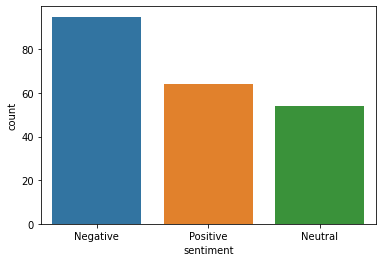

In [117]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [118]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Maharashtra/ncp_maharashtra.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

385

In [119]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [120]:
word_emotion=dict()
for i in range(0,385):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [121]:
from numpy import nan
nan == nan


False

In [122]:
for i in range(0,1202):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

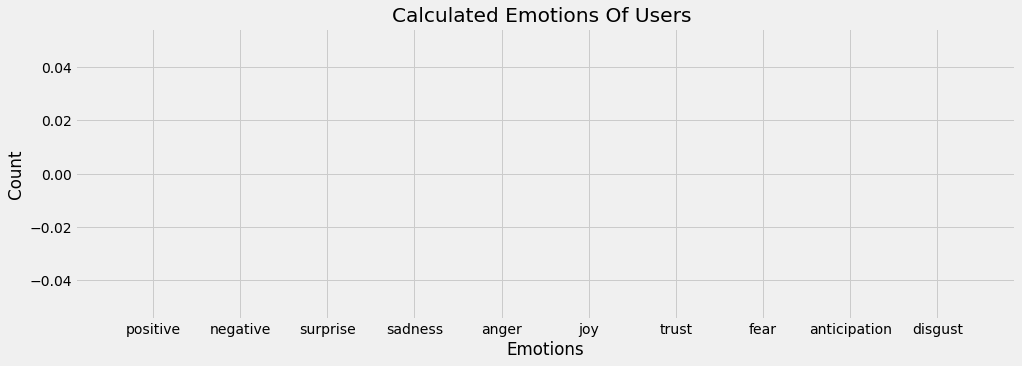

In [123]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [124]:
df.Location  = df.Location.fillna('INDIA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [125]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                       65
India                  25
Mumbai                 11
Mumbai, India           8
New Delhi               7
                       ..
Bangalore,India         1
वसुधैव कुटुंबकम्        1
Bengaluru,Bharat        1
New Delhi India         1
Burlington, Ontario     1
Name: Location, Length: 80, dtype: int64

In [126]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 20:07:03,1330241334846885890,False,@NagariMumbaikar @arvindgunasekar I think u r ...,suresh_sushmita,,Twitter for iPhone,8,652,616,0,"[think, poor, math, let, explain, bjp, got, se...",
1,2020-11-21 18:43:22,1330220273300332549,False,@OfficeofUT @AUThackeray @rautsanjay61 \n\nIf ...,anup_dhule,,Twitter for Android,0,433,435,0,"[want, win, heart, mumbaikar, maharashtra, sup...",
2,2020-11-21 15:26:44,1330170788528480262,False,@gauti8619 @WcwwweU @arvindgunasekar 😂 it's Ma...,NagariMumbaikar,"Maharashtra, India",Twitter for Android,0,20,181,0,"[maharashtra, friend, saw, call, chanakya, bjp...",Maharashtra
3,2020-11-21 15:17:05,1330168362748547072,False,@gauti8619 @WcwwweU @arvindgunasekar On which ...,NagariMumbaikar,"Maharashtra, India",Twitter for Android,0,20,181,0,"[planet, leav, bjp, mla, join, ncp, shivsena, ...",Maharashtra
4,2020-11-21 11:40:59,1330113977045671936,False,The Congress’ frustration in the Maharashtra g...,SUMEETGOSWAMI,South wales,Twitter Web App,0,19,167,0,"[congress, frustrat, maharashtra, govt, delhi,...",South wales
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2020-11-15 15:07:33,1327991637251739650,False,@Swamy39 @Dharma2X @SeriSushant @here_for_ssr ...,Andy_Cool28,,Twitter for Android,5,51,314,2,"[swami, repli, next, strategi, ncp, congi, mah...",
209,2020-11-15 14:51:56,1327987705397923840,False,@ANI You should ask to congress and NCP about ...,vij301,,Twitter for Android,0,2,39,0,"[ask, congress, ncp, maharashtra, govern, uddh...",
210,2020-11-15 13:23:51,1327965539696664579,False,Ms. @_sabanaqvi who celebrated Sena-Con-NCP Go...,MihirkJha,Twitter,Twitter for Android,67,12161,794,18,"[celebr, sena, con, ncp, govt, maharashtra, ma...",Twitter
211,2020-11-15 13:11:23,1327962399555534849,False,@ShefVaidya @CTRavi_BJP Maharashtra BJP is in ...,srinidhi4tweet,,Twitter Web App,12,22,254,3,"[maharashtra, bjp, even, dire, state, cast, po...",


In [127]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [128]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 20:07:03,1330241334846885890,False,@NagariMumbaikar @arvindgunasekar I think u r ...,suresh_sushmita,,Twitter for iPhone,8,652,616,0,"[think, poor, math, let, explain, bjp, got, se...",,Negative,21
1,2020-11-21 18:43:22,1330220273300332549,False,@OfficeofUT @AUThackeray @rautsanjay61 \n\nIf ...,anup_dhule,,Twitter for Android,0,433,435,0,"[want, win, heart, mumbaikar, maharashtra, sup...",,Positive,21
2,2020-11-21 15:26:44,1330170788528480262,False,@gauti8619 @WcwwweU @arvindgunasekar 😂 it's Ma...,NagariMumbaikar,"Maharashtra, India",Twitter for Android,0,20,181,0,"[maharashtra, friend, saw, call, chanakya, bjp...",Maharashtra,Positive,21
3,2020-11-21 15:17:05,1330168362748547072,False,@gauti8619 @WcwwweU @arvindgunasekar On which ...,NagariMumbaikar,"Maharashtra, India",Twitter for Android,0,20,181,0,"[planet, leav, bjp, mla, join, ncp, shivsena, ...",Maharashtra,Positive,21
4,2020-11-21 11:40:59,1330113977045671936,False,The Congress’ frustration in the Maharashtra g...,SUMEETGOSWAMI,South wales,Twitter Web App,0,19,167,0,"[congress, frustrat, maharashtra, govt, delhi,...",South wales,Neutral,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


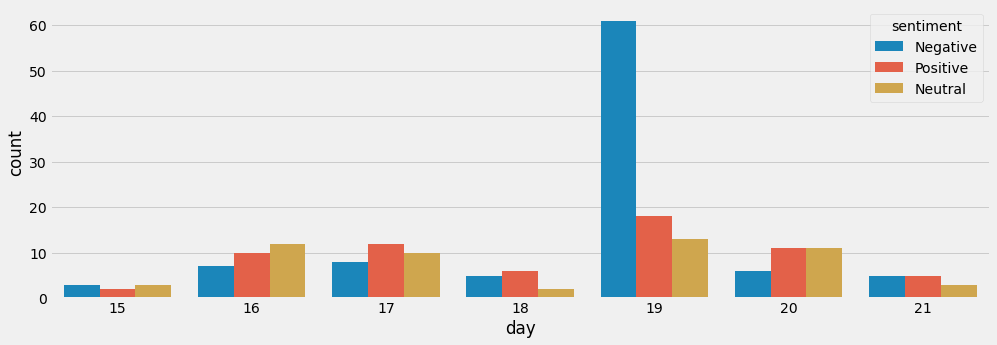

In [129]:
sns.countplot(df['day'],hue = df['sentiment'])

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [131]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 20:07:03,1330241334846885890,False,@NagariMumbaikar @arvindgunasekar I think u r ...,suresh_sushmita,,Twitter for iPhone,8,652,616,0,"[think, poor, math, let, explain, bjp, got, se...",,Negative,21,0
1,2020-11-21 18:43:22,1330220273300332549,False,@OfficeofUT @AUThackeray @rautsanjay61 \n\nIf ...,anup_dhule,,Twitter for Android,0,433,435,0,"[want, win, heart, mumbaikar, maharashtra, sup...",,Positive,21,2
2,2020-11-21 15:26:44,1330170788528480262,False,@gauti8619 @WcwwweU @arvindgunasekar 😂 it's Ma...,NagariMumbaikar,"Maharashtra, India",Twitter for Android,0,20,181,0,"[maharashtra, friend, saw, call, chanakya, bjp...",Maharashtra,Positive,21,2
3,2020-11-21 15:17:05,1330168362748547072,False,@gauti8619 @WcwwweU @arvindgunasekar On which ...,NagariMumbaikar,"Maharashtra, India",Twitter for Android,0,20,181,0,"[planet, leav, bjp, mla, join, ncp, shivsena, ...",Maharashtra,Positive,21,2
4,2020-11-21 11:40:59,1330113977045671936,False,The Congress’ frustration in the Maharashtra g...,SUMEETGOSWAMI,South wales,Twitter Web App,0,19,167,0,"[congress, frustrat, maharashtra, govt, delhi,...",South wales,Neutral,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2020-11-15 15:07:33,1327991637251739650,False,@Swamy39 @Dharma2X @SeriSushant @here_for_ssr ...,Andy_Cool28,,Twitter for Android,5,51,314,2,"[swami, repli, next, strategi, ncp, congi, mah...",,Positive,15,2
209,2020-11-15 14:51:56,1327987705397923840,False,@ANI You should ask to congress and NCP about ...,vij301,,Twitter for Android,0,2,39,0,"[ask, congress, ncp, maharashtra, govern, uddh...",,Neutral,15,1
210,2020-11-15 13:23:51,1327965539696664579,False,Ms. @_sabanaqvi who celebrated Sena-Con-NCP Go...,MihirkJha,Twitter,Twitter for Android,67,12161,794,18,"[celebr, sena, con, ncp, govt, maharashtra, ma...",Twitter,Neutral,15,1
211,2020-11-15 13:11:23,1327962399555534849,False,@ShefVaidya @CTRavi_BJP Maharashtra BJP is in ...,srinidhi4tweet,,Twitter Web App,12,22,254,3,"[maharashtra, bjp, even, dire, state, cast, po...",,Negative,15,0


In [132]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [134]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [135]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [136]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.640625
Precision Score:  0.640625
Recall Score:  0.640625
F1 Score:  0.640625


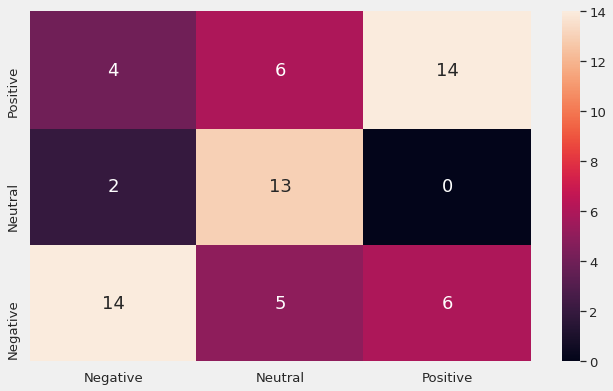

In [137]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [138]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [139]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [140]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5295238095238095
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [141]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.46875
Precision Score:  0.46875
Recall Score:  0.46875
F1 Score:  0.46875


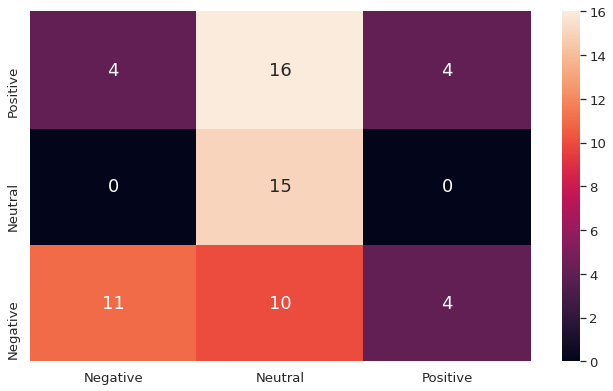

In [142]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [143]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [144]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.578125
Precision Score:  0.578125
Recall Score:  0.578125
F1 Score:  0.578125


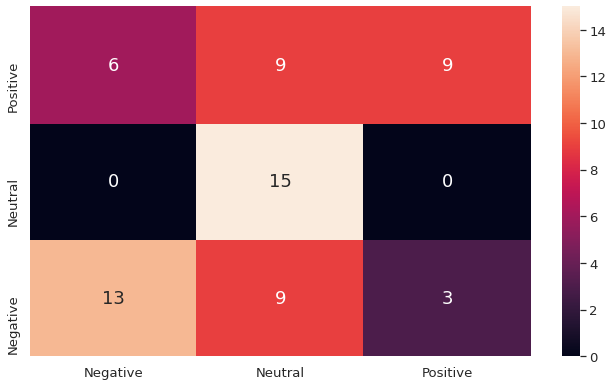

In [145]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [146]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [147]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, max_depth=12, criterion=gini, score=0.467, total=   0.7s
[CV] n_estimators=400, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=400, max_depth=12, criterion=gini, score=0.600, total=   0.5s
[CV] n_estimators=400, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=400, max_depth=12, criterion=gini, score=0.367, total=   0.7s
[CV] n_estimators=400, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=400, max_depth=12, criterion=gini, score=0.600, total=   0.7s
[CV] n_estimators=400, max_depth=12, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=400, max_depth=12, criterion=gini, score=0.276, total=   0.7s
[CV] n_estimators=1200, max_depth=9, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=9, criterion=entropy, score=0.467, total=   1.7s
[CV] n_estimators=1200, max_depth=9, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=9, criterion=entropy, score=0.567, total=   1.9s
[CV] n_estimators=1200, max_depth=9, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.0s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=9, criterion=entropy, score=0.333, total=   1.8s
[CV] n_estimators=1200, max_depth=9, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.8s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=9, criterion=entropy, score=0.600, total=   1.7s
[CV] n_estimators=1200, max_depth=9, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.5s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=9, criterion=entropy, score=0.276, total=   1.9s
[CV] n_estimators=800, max_depth=19, criterion=entropy ...............
[CV]  n_estimators=800, max_depth=19, criterion=entropy, score=0.600, total=   1.4s
[CV] n_estimators=800, max_depth=19, criterion=entropy ...............
[CV]  n_estimators=800, max_depth=19, criterion=entropy, score=0.733, total=   1.4s
[CV] n_estimators=800, max_depth=19, criterion=entropy ...............
[CV]  n_estimators=800, max_depth=19, criterion=entropy, score=0.433, total=   1.4s
[CV] n_estimators=800, max_depth=19, criterion=entropy ...............
[CV]  n_estimators=800, max_depth=19, criterion=entropy, score=0.567, total=   1.4s
[CV] n_estimators=800, max_depth=19, criterion=entropy ...............
[CV]  n_estimators=800, max_depth=19, criterion=entropy, score=0.379, total=   1.3s
[CV] n_estimators=900, max_depth=12, criterion=gini ..................
[CV]  n_estimators=900, max_depth=12, criterion=gini, score=0.500, tot

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   57.4s finished


0.5425287356321838
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 19, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 800, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [148]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.578125
Precision Score:  0.578125
Recall Score:  0.578125
F1 Score:  0.578125


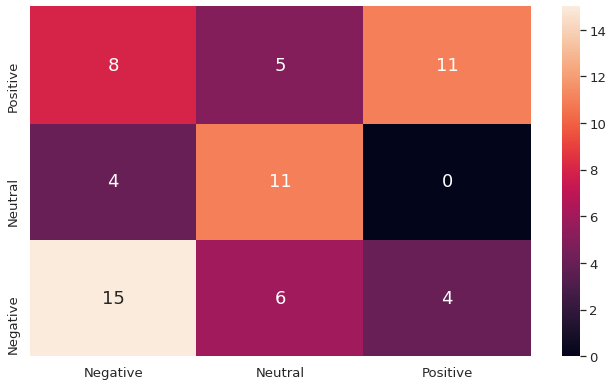

In [149]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [150]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.515625
Precision Score:  0.515625
Recall Score:  0.515625
F1 Score:  0.515625


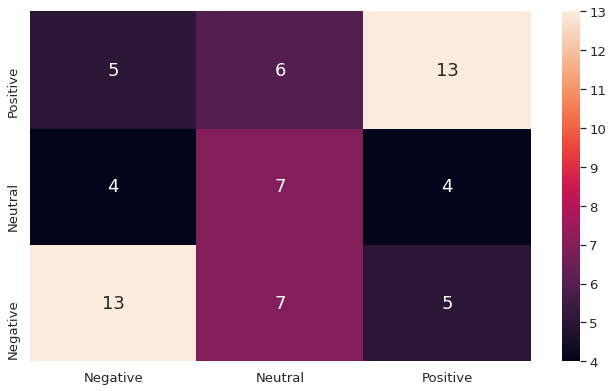

In [151]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [152]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [153]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.5628571428571428
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [154]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.515625
Precision Score:  0.515625
Recall Score:  0.515625
F1 Score:  0.515625


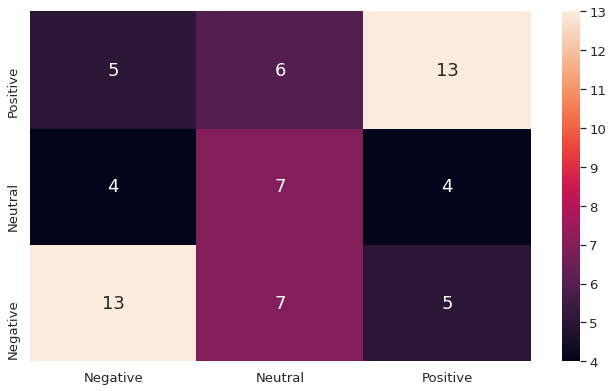

In [155]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

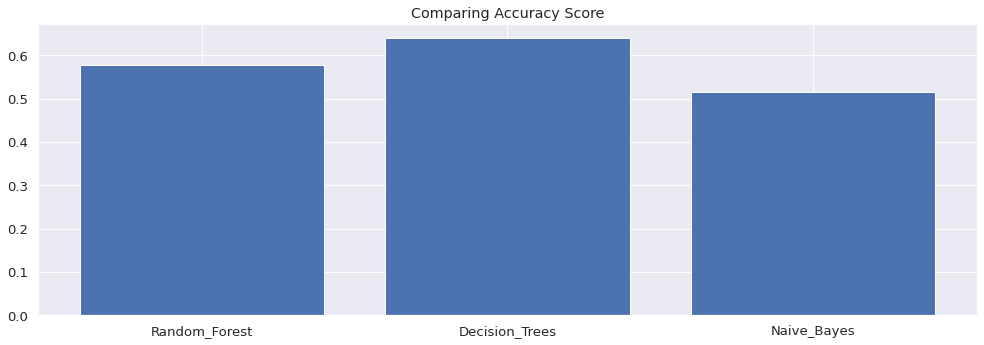

In [156]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

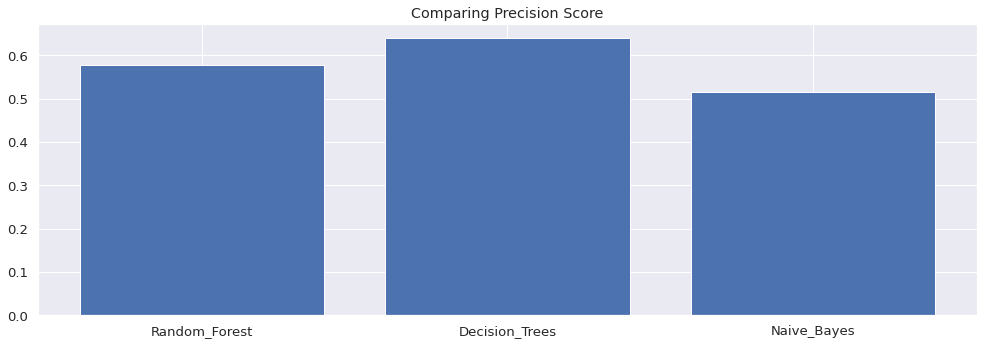

In [157]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

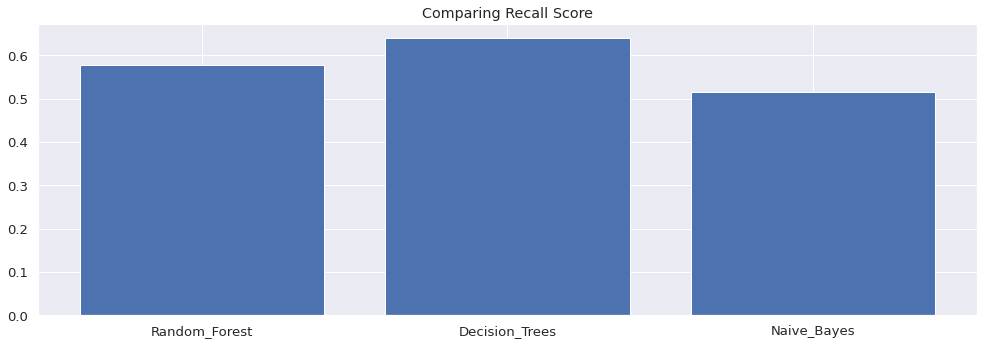

In [158]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

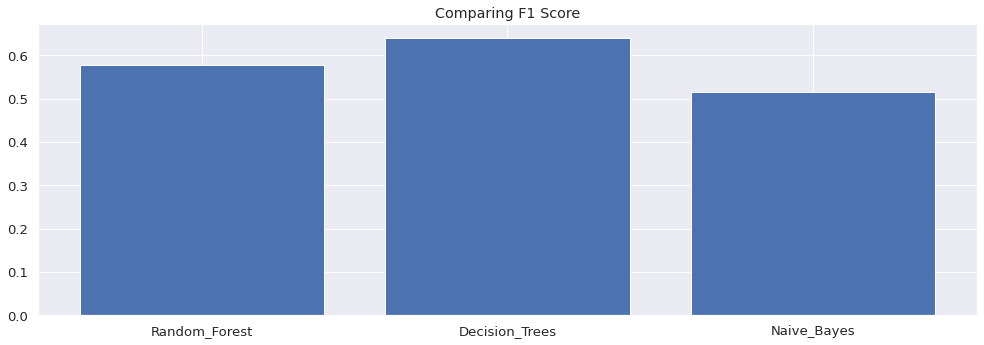

In [159]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()